In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df_test = pd.read_csv(r'F:\pk\01_Data_science\ASSIGNMENTS\17_support_vector_machine\SalaryData_Test.csv')

In [3]:
df_train = pd.read_csv(r'F:\pk\01_Data_science\ASSIGNMENTS\17_support_vector_machine\SalaryData_Train.csv')

In [4]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [6]:
# label encoding

def label_encoding(data):
    
    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    
    for i in data.select_dtypes(include=object).columns:
        data[i]= label_encoder.fit_transform(data.select_dtypes(include=object)[i]) 
        
    return data.head()

In [7]:
label_encoding(df_train)
label_encoding(df_test)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0


In [9]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [10]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

train_x = pd.DataFrame(scalar.fit_transform(df_train.iloc[:,:-1]), columns = df_train.iloc[:,:-1].columns)
test_x = pd.DataFrame(scalar.fit_transform(df_test.iloc[:,:-1]), columns = df_test.iloc[:,:-1].columns)



train_y = df_train.iloc[:,-1:]
test_y = df_test.iloc[:,-1:]



In [16]:
#creating model 

from sklearn.svm import SVC

classifire=SVC(kernel="rbf")
classifire.fit(train_x,train_y)

C:\Users\PawanK\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [17]:
#prediction and accuracy

from sklearn.metrics import accuracy_score

y_pred=classifire.predict(test_x)
accuracy_score(test_y,y_pred)

0.846547144754316

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
test_cm = confusion_matrix(test_y,y_pred)

In [21]:
test_cm

array([[10715,   645],
       [ 1666,  2034]], dtype=int64)

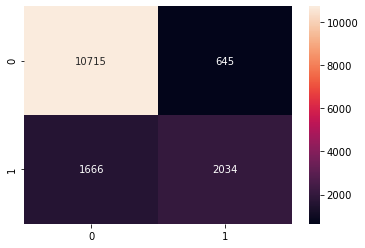

<Figure size 720x576 with 0 Axes>

In [23]:

import matplotlib.pyplot as plt
#confusion matrix for test dataset

figure, ax2 = plt.subplots(1,1)
plt.figure(figsize=(10,8))
sns.heatmap(test_cm, annot=True, ax = ax2, fmt = 'g')
plt.show()



In [24]:
train_score = classifire.score(train_x, train_y).round(3)
test_score = classifire.score(test_x, test_y).round(3)

result_df = pd.DataFrame({'parameters':['train_score', 'test_score',],\
                         'score':[train_score, test_score,]})

In [25]:
result_df

,parameters,score
0,train_score,0.851
1,test_score,0.847
